In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cash1 =  pd.read_csv('../project_dataset/cash_request.csv')
cash1.set_index(['id'], inplace=True)
cash1.head()

,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
id,,,,,,,,,,,,,,,
5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [4]:
cash = cash1.copy()
cash.head()

,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
id,,,,,,,,,,,,,,,
5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [5]:
#Convertir mediante pandas el valor de la columna a datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])
# Reemplazar NaN en user_id con los valores de deleted_account_id para no perder información de las cuentas eliminadas.
cash['user_id'].fillna(cash['deleted_account_id'])
#Convertir Created at a fecha tipo aaaa-mm
cash['YM'] = cash['created_at'].dt.to_period('M')
#Crear cohorte a partir del created at del cash request y su primera cash request (podría haber múltiples)
cash['cohortes'] = cash.groupby('user_id')['YM'].transform('min')
#Obtener fecha real de cuando se ha producido la cash request
cash.sort_values(by='user_id', inplace=True)
cash[['cohortes', 'YM', 'user_id']].head(10)

/tmp/ipykernel_7680/2725994074.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['YM'] = cash['created_at'].dt.to_period('M')


,cohortes,YM,user_id
id,,,
1302,2020-04,2020-04,34.0
758,2019-12,2020-02,35.0
510,2019-12,2020-01,35.0
12794,2019-12,2020-08,35.0
150,2019-12,2019-12,35.0
326,2019-12,2019-12,35.0
16860,2019-12,2020-09,35.0
918,2019-12,2020-03,35.0
10942,2019-11,2020-08,47.0


In [6]:
#calculamos el total de cash requests que tienen incidencias, que equivalen a los que tiene el status como recovery status
cash['recovery_status'].count()

3330

In [7]:
#agrupar datos en nueva tabla que analizará las incidencias que se han producido
cash_incident = cash.groupby(['cohortes', 'YM'])['recovery_status'].count().reset_index()
#crear tabla pivot a partir de los cohortes y del YM solo con los status que tienen recovery_status
incident_pivot = cash_incident.pivot(index='cohortes', columns='YM', values='recovery_status')
incident_pivot

YM,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohortes,,,,,,,,,,,,,
2019-11,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN
2019-12,NaN,36.0,11.0,7.0,5.0,4.0,12.0,14.0,4.0,6.0,4.0,9.0,0.0
2020-01,NaN,NaN,14.0,1.0,1.0,3.0,2.0,2.0,6.0,1.0,2.0,3.0,0.0
2020-02,NaN,NaN,NaN,7.0,3.0,3.0,5.0,4.0,6.0,5.0,1.0,2.0,NaN
2020-03,NaN,NaN,NaN,NaN,6.0,4.0,5.0,9.0,3.0,5.0,3.0,1.0,0.0
2020-04,NaN,NaN,NaN,NaN,NaN,38.0,21.0,24.0,13.0,18.0,7.0,9.0,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,68.0,34.0,41.0,25.0,17.0,18.0,1.0
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,99.0,116.0,96.0,76.0,1.0
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,133.0,87.0,93.0,1.0


In [8]:
#Para calcular la tasa de incidencias necesitamos el total de cash request por cohorte para poder dividir la tabla anterior entre ese total y tener el porcentaje
cash_requests_total = cash.groupby('cohortes')['user_id'].count()
cash_requests_total

cohortes
2019-11       8
2019-12     893
2020-01     321
2020-02     423
2020-03     323
2020-04     840
2020-05    1449
2020-06    4711
2020-07    3735
2020-08    1510
2020-09    2636
2020-10    4943
2020-11      75
Freq: M, Name: user_id, dtype: int64

In [9]:
#Crear tabla con tasa de incidencia a partir de la división
tasa_incident = incident_pivot / cash_requests_total
tasa_incident

YM,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohortes,,,,,,,,,,,,,
2019-11,0.0,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
2019-12,NaN,0.040314,0.034268,0.016548,0.015480,0.004762,0.008282,0.002972,0.001071,0.003974,0.001517,0.001821,0.000000
2020-01,NaN,NaN,0.043614,0.002364,0.003096,0.003571,0.001380,0.000425,0.001606,0.000662,0.000759,0.000607,0.000000
2020-02,NaN,NaN,NaN,0.016548,0.009288,0.003571,0.003451,0.000849,0.001606,0.003311,0.000379,0.000405,NaN
2020-03,NaN,NaN,NaN,NaN,0.018576,0.004762,0.003451,0.001910,0.000803,0.003311,0.001138,0.000202,0.000000
2020-04,NaN,NaN,NaN,NaN,NaN,0.045238,0.014493,0.005094,0.003481,0.011921,0.002656,0.001821,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,0.046929,0.007217,0.010977,0.016556,0.006449,0.003642,0.013333
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042454,0.026506,0.076821,0.036419,0.015375,0.013333
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050870,0.088079,0.033005,0.018814,0.013333


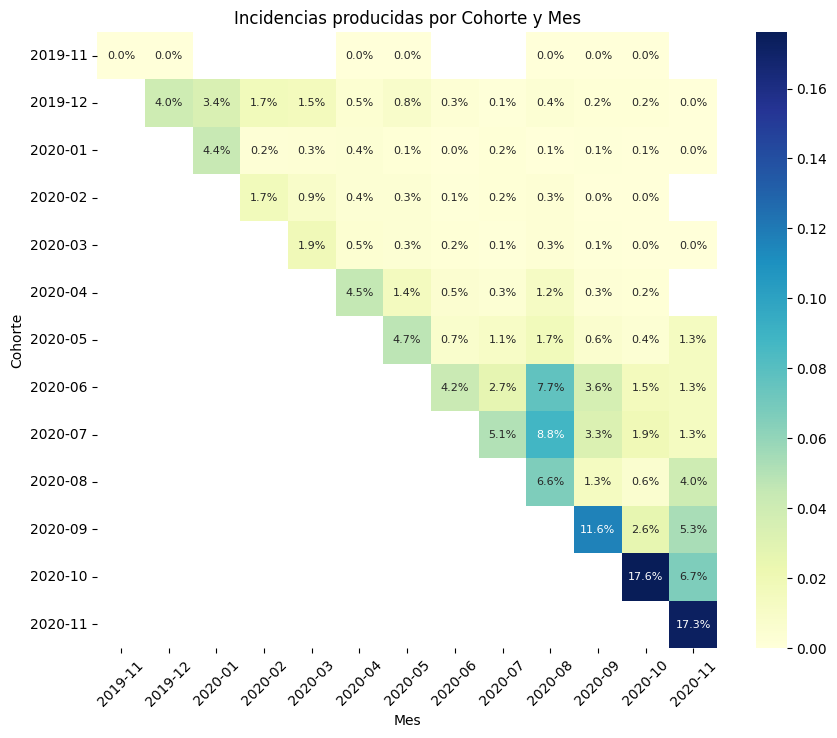

In [10]:
# Ajustar el tamaño de la fuente
plt.figure(figsize=(10, 8))
sns.heatmap(tasa_incident, cmap="YlGnBu", annot=True, fmt=".1%", annot_kws={"size": 8}) # Tamaño de fuente reducido para que se vea bien
plt.title('Incidencias producidas por Cohorte y Mes')
plt.xlabel('Mes')
plt.ylabel('Cohorte')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)

plt.show()

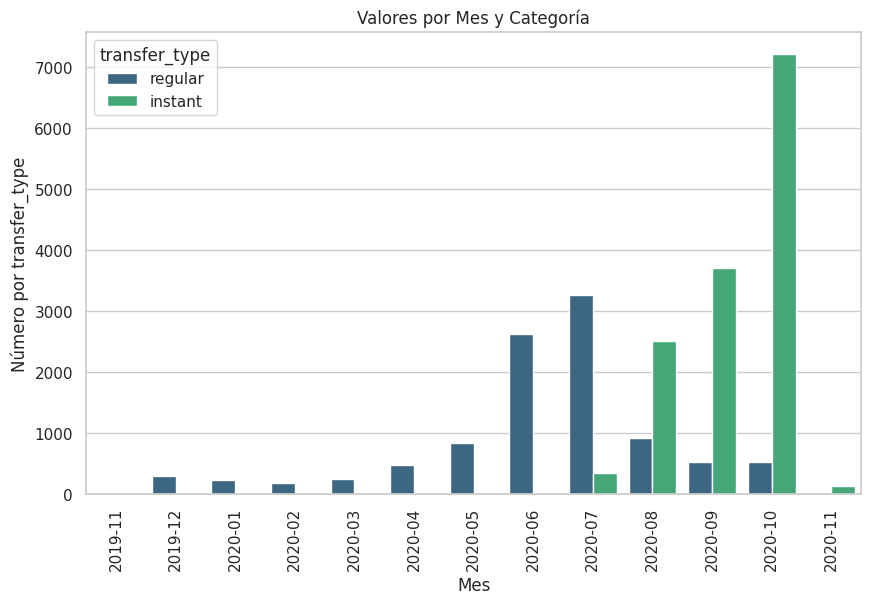

In [29]:
info = cash.groupby(["YM", "transfer_type"])["created_at"].size().reset_index(name='count')


sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='YM', y='count', hue='transfer_type', data=info, palette='viridis')

# Añadir título y etiquetas
plt.title('Valores por Mes y Categoría')
plt.xlabel('Mes')
plt.ylabel('Número por transfer_type')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

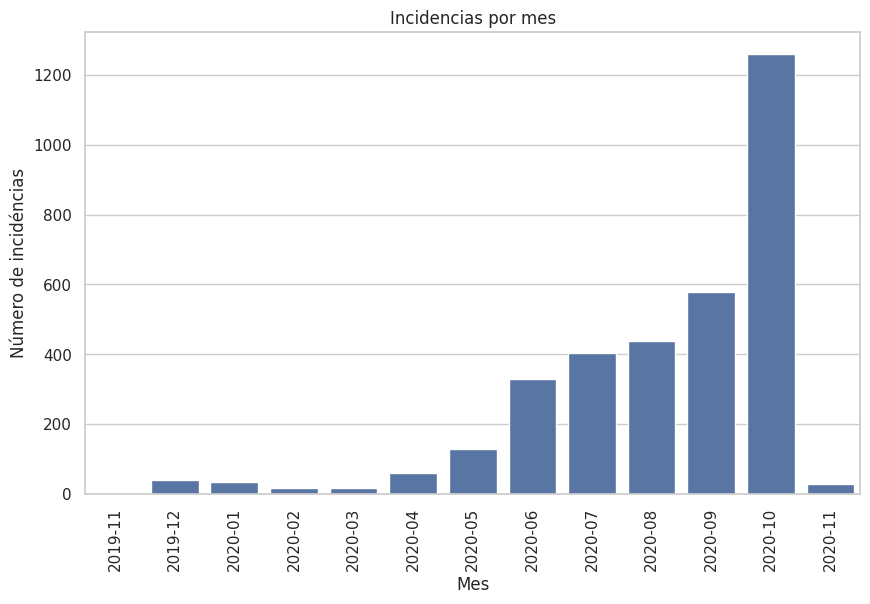

In [31]:
info = cash.groupby(["YM"])["recovery_status"].count().reset_index(name='count')

sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='YM', y='count', data=info)

# Añadir título y etiquetas
plt.title('Incidencias por mes')
plt.xlabel('Mes')
plt.ylabel('Número de incidéncias')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()